<a href="https://colab.research.google.com/github/Priyankasgupta17/Priyanka/blob/main/Assignment1_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1:

Importing all the required library, scale the data, and dividing training and test dataset.


In [546]:
## import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [547]:
## Load the data and check for any missing data
data = pd.read_csv("diabetes.csv")
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [548]:
## defining the Independent and Dependent variables
X = data.drop(columns='Outcome')
y = data['Outcome']

In [549]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.2,stratify=y,random_state=0)

In [550]:
# Scaling the data using Standard scaler
scaler = StandardScaler()
X_train_Scale = scaler.fit_transform(X_train)
X_test_Scale = scaler.transform(X_test)

In [551]:
# Creating logistic regression model
logit = LogisticRegression(max_iter=100)
logit.fit(X_train_Scale,y_train)

LogisticRegression()

In [552]:
# Using Logistic regression predicting the target
y_pred_train = logit.predict(X_train_Scale)
y_pred_test = logit.predict(X_test_Scale)

Training Accuracy: 0.7801302931596091
Test Accuracy: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



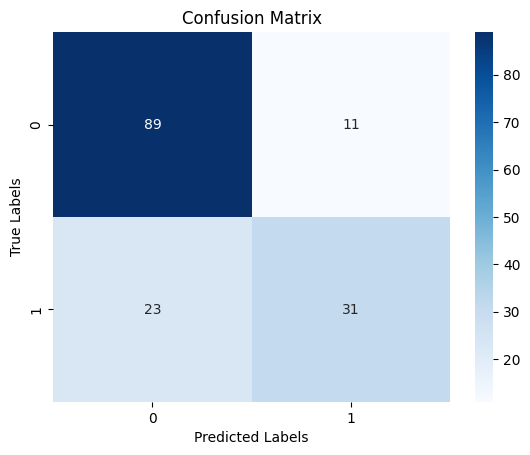

In [553]:
# Print all the desired output
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [554]:
# creating KNN model using 4 nearest neighbor
knn_c = KNeighborsClassifier(n_neighbors=4)
knn_c.fit(X_train_Scale, y_train)
# Predicting target variable using KNN model and scaled data
pred_train = knn_c.predict(X_train_Scale)
pred_test = knn_c.predict(X_test_Scale)

Training Accuracy: 0.8045602605863192
Test Accuracy: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       100
           1       0.81      0.48      0.60        54

    accuracy                           0.78       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.79      0.78      0.76       154



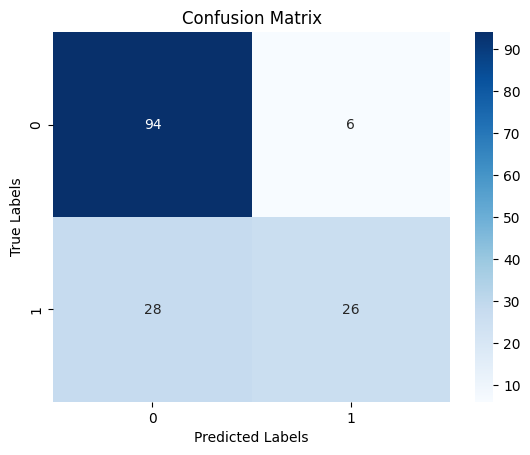

In [555]:
# Print all the desired output
print("Training Accuracy:", accuracy_score(y_train, pred_train))
print("Test Accuracy:", accuracy_score(y_test, pred_test))
print("Classification Report:\n", classification_report(y_test, pred_test))
sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Results:
Both the model has almost same accuracy, so both the models will work well, we need to decide the model on the basis of our prediction requirements.

*   If your main goal is to predict Class 0, KNN could be a bit better because it's good at finding common cases.


*   If you need to predict Class 1, then Logistic Regression might be the better choice because it strikes a better balance in being accurate and reliable for these cases.

*  If you need a model that's easy to understand and work with, Logistic Regression is probably the better choice.


*   Logistic also has less difference in its training and testing accuracy that indicated it is slightly more reliable than KNN.








# Question 2:

Importing all the required library, scale the data, and dividing training and test dataset.

In [556]:
# Loading the dataset
data = pd.read_csv("House_Rent_Dataset.csv")
data.count()
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [557]:
# Imported all the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [558]:
# Did label encoding to convert categorical variables and checked the correlation
label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])
data['Furnishing Status'] = label_encoder.fit_transform(data['Furnishing Status'])
data['Floor'] = label_encoder.fit_transform(data['Floor'])
data['Area Type'] = label_encoder.fit_transform(data['Area Type'])
data['Area Locality'] = label_encoder.fit_transform(data['Area Locality'])
data['Tenant Preferred'] = label_encoder.fit_transform(data['Tenant Preferred'])
data['Point of Contact'] = label_encoder.fit_transform(data['Point of Contact'])
data['Posted On'] = label_encoder.fit_transform(data['Posted On'])
data.corr()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,1.000000,0.118987,0.107818,0.139422,-0.001316,-0.226989,0.004785,0.095874,-0.054728,-0.012807,0.160427,-0.300790
BHK,0.118987,1.000000,0.369718,0.716145,-0.005432,-0.153225,0.016211,0.046914,-0.140264,0.041534,0.794885,-0.230954
Rent,0.107818,0.369718,1.000000,0.413551,0.024250,-0.214867,-0.018849,0.210525,-0.146251,0.006027,0.441215,-0.339677
Size,0.139422,0.716145,0.413551,1.000000,0.007967,-0.079705,-0.006800,-0.049831,-0.172783,0.031500,0.740703,-0.214327
Floor,-0.001316,-0.005432,0.024250,0.007967,1.000000,-0.020014,-0.021142,0.098340,-0.014131,0.016247,-0.003751,-0.025098
Area Type,-0.226989,-0.153225,-0.214867,-0.079705,-0.020014,1.000000,-0.007743,-0.282856,0.056276,0.155388,-0.183012,0.559451
Area Locality,0.004785,0.016211,-0.018849,-0.006800,-0.021142,-0.007743,1.000000,-0.042836,0.015144,-0.030848,0.010241,0.000294
City,0.095874,0.046914,0.210525,-0.049831,0.098340,-0.282856,-0.042836,1.000000,0.002633,0.041769,0.108257,-0.357165
Furnishing Status,-0.054728,-0.140264,-0.146251,-0.172783,-0.014131,0.056276,0.015144,0.002633,1.000000,-0.092878,-0.181425,0.131276
Tenant Preferred,-0.012807,0.041534,0.006027,0.031500,0.016247,0.155388,-0.030848,0.041769,-0.092878,1.000000,0.056894,0.063182


In [559]:
# Used relevant independent variable(BHK,Bathroom, Size,City, Point of Contact, Area Type) to predict Rent by comparing the correlation
X = data[['BHK','Size','Bathroom','City','Point of Contact','Area Type']]
y = np.log(data['Rent'])

In [560]:
# Divided the data into train and test and shuffeled the data
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=42)

In [561]:
# Used standard scaler to scale the values
scaler = StandardScaler()
X_train_Scale = scaler.fit_transform(X_train)
X_test_Scale = scaler.transform(X_test)

Linear Regression:

In [562]:
# Created Linear regression model using scaled independent variables and target from training dataset
logit1 = LinearRegression()
logit1.fit(X_train_Scale,y_train)

LinearRegression()

In [563]:
# Created training and test prediction
y_pred_train = logit1.predict(X_train_Scale)
y_pred_test = logit1.predict(X_test_Scale)
y_test_original = np.exp(y_test)
y_pred_test_original = np.exp(y_pred_test)


In [564]:
# Output for Linear model MSE, MAE, R2
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("R2:", r2_score(y_test, y_pred_test))
print("MSE Original:", mean_squared_error(y_test_original, y_pred_test_original))
print("MAE Original:", mean_absolute_error(y_test_original, y_pred_test_original))
print("R2 Original:", r2_score(y_test_original, y_pred_test_original))

MSE: 0.25524080752060563
MAE: 0.39523465475021985
R2: 0.7105007853538856
MSE Original: 1700768927.1662612
MAE Original: 14479.698400984451
R2 Original: 0.5167375745009476


Lasso Model:

In [565]:
# Created Lasso model using scaled independent variables and target from training dataset
logit2 = Lasso(alpha=1)
logit2.fit(X_train_Scale,y_train)

Lasso(alpha=1)

In [566]:
# Created training and test prediction
y_pred_train1 = logit1.predict(X_train_Scale)
y_pred_test1 = logit1.predict(X_test_Scale)
y_test_original1 = np.exp(y_test)
y_pred_test_original1 = np.exp(y_pred_test1)

In [567]:
# Output for Lasso model MSE, MAE, R2
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MSE Orignal:", mean_squared_error(y_test_original1, y_pred_test_original1))
print("MAE Original:", mean_absolute_error(y_test_original1, y_pred_test_original1))
print("R2 Original:", r2_score(y_test_original1, y_pred_test_original1))

MSE: 0.25524080752060563
MAE: 0.39523465475021985
R2: 0.7105007853538856
MSE Orignal: 1700768927.1662612
MAE Original: 14479.698400984451
R2 Original: 0.5167375745009476


Ridge:

In [568]:
# Created Ridge model using scaled independent variables and target from training dataset
logit3 = Ridge()
logit3.fit(X_train_Scale,y_train)

Ridge()

In [569]:
# Created training and test prediction
y_pred_train2 = logit3.predict(X_train_Scale)
y_pred_test2 = logit3.predict(X_test_Scale)
y_test_original2 = np.exp(y_test)
y_pred_test_original2 = np.exp(y_pred_test2)

In [570]:
# Output for Ridge model MSE, MAE, R2
print("MSE:", mean_squared_error(y_test, y_pred_test2))
print("MAE:", mean_absolute_error(y_test, y_pred_test2))
print("R2:", r2_score(y_test, y_pred_test2))
print("MSE Original:", mean_squared_error(y_test_original2, y_pred_test_original2))
print("MAE Original:", mean_absolute_error(y_test_original2, y_pred_test_original2))
print("R2 Original:", r2_score(y_test_original2, y_pred_test_original2))

MSE: 0.25524770389807655
MAE: 0.39523472650411423
R2: 0.7104929633450104
MSE Original: 1700636422.2187753
MAE Original: 14479.612747124058
R2 Original: 0.5167752249197022


# Result:
There is very minimal difference between the prediction of all 3 Linear ridge and Lasso model. This suggests that for this particular dataset, the choice among the model may depend on other factors such as feature selection with Lasso or strength regularization with Ridge rather than performance metrics alone.